In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import datetime
import statsmodels.api as sm

- Let $P_{\text{ETF}}(t)$ be the price of the ETF at time $t$.
- Let $P_i(t)$ be the price of the $i$-th component stock at time $t$.
- Let $w_i$ be the weight of the $i$-th component in the ETF.
$$P_{\text{components}}(t) = \sum_{i=1}^{N} w_i \cdot P_i(t)$$
- where $N$ is the number of component stocks.
$$D(t) = P_{\text{ETF}}(t) - P_{\text{components}}(t)$$

Define a threshold $\theta$ for significant deviation.
- **Long Signal**: If $D(t) < -\theta$, buy the ETF and sell the components.
- **Short Signal**: If $D(t) > \theta$, sell the ETF and buy the components.



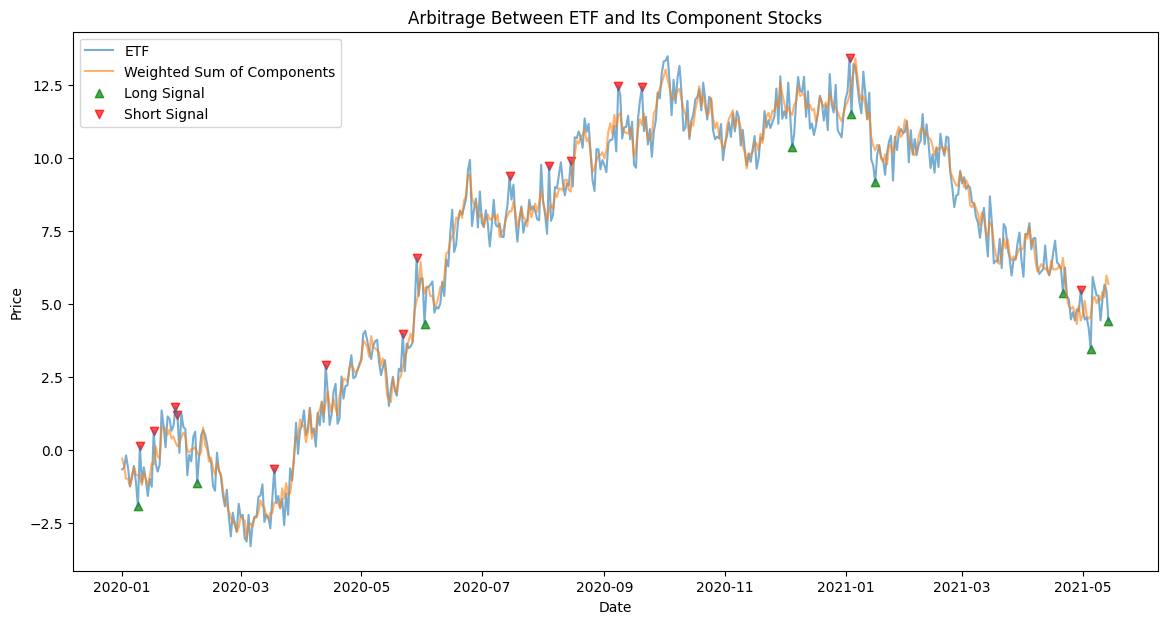

In [2]:
def calculate_weighted_sum(df_components, weights):
    return df_components.dot(weights)

def generate_signals(df_etf, df_components, weights, threshold):
    weighted_sum = calculate_weighted_sum(df_components, weights)
    deviation = df_etf - weighted_sum
    long_signals = deviation < -threshold
    short_signals = deviation > threshold
    return long_signals, short_signals, deviation

# Example usage
# Generate synthetic data for demonstration
np.random.seed(42)
dates = pd.date_range('2020-01-01', periods=500)
num_components = 10
weights = np.random.rand(num_components)
weights /= weights.sum()  # normalize weights
component_prices = np.cumsum(np.random.randn(500, num_components), axis=0)
etf_price = component_prices.dot(weights) + np.random.normal(0, 0.5, 500)  # ETF price with some noise

# Create DataFrame
df_components = pd.DataFrame(component_prices, index=dates, columns=[f'Component_{i}' for i in range(num_components)])
# Get df
df_etf = pd.Series(etf_price, index=dates, name='ETF')
# Define threshold
threshold = 1.0
# Generate signals
long_signals, short_signals, deviation = generate_signals(df_etf, df_components, weights, threshold)

# Plot results
plt.figure(figsize=(14, 7))
plt.plot(df_etf.index, df_etf, label='ETF', alpha=0.6)
plt.plot(df_etf.index, calculate_weighted_sum(df_components, weights), label='Weighted Sum of Components', alpha=0.6)
plt.scatter(df_etf.index[long_signals], df_etf[long_signals], marker='^', color='g', alpha=0.7, label='Long Signal')
plt.scatter(df_etf.index[short_signals], df_etf[short_signals], marker='v', color='r', alpha=0.7, label='Short Signal')
plt.title('Arbitrage Between ETF and Its Component Stocks')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

